# 📊 Projeto de Detecção de Diabetes usando Machine Learning

Este notebook apresenta todas as etapas realizadas para a construção de modelos de machine learning voltados à detecção de diabetes. 

Inclui:
- Análise exploratória dos dados
- Pré-processamento
- Treinamento de diferentes classificadores
- Avaliação de desempenho (AUC, matriz de confusão, curva ROC)
- Curvas de aprendizado
- Teste com novos dados
- Salvamento dos modelos e métricas

Os melhores modelos serão utilizados na aplicação final (web app).

In [57]:
# Importamos as bibliotecas principais para manipulação de dados, visualização e modelagem
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import matplotlib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Exibe as versões das bibliotecas usadas para controle e reprodutibilidade
print("Versões utilizadas:")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Scikit-Learn: {sklearn.__version__}")

Versões utilizadas:
Pandas: 2.2.3
NumPy: 2.2.6
Matplotlib: 3.10.3
Scikit-Learn: 1.6.1


In [2]:
# Lista com os nomes traduzidos das colunas para facilitar a leitura e entendimento dos dados
colunas_traduzidas = [
    'Idade',
    'Sexo',
    'Poliúria',  # Urinar com frequência
    'Polidipsia',  # Sede excessiva
    'Perda de Peso Súbita',
    'Fraqueza',
    'Polifagia',  # Fome excessiva
    'Candidíase Genital',
    'Visão Embaçada',
    'Coceira',
    'Irritabilidade',
    'Cicatrização Demorada',
    'Paresia Parcial',
    'Rigidez Muscular',
    'Alopecia',  # Queda de cabelo
    'Obesidade',
    'Classe'  # Indicação se é diabético ou não
]

In [3]:
# Carrega o dataset CSV para o DataFrame
diabetes = pd.read_csv('diabetes_data_upload.csv') 

In [4]:
# Aplica os nomes traduzidos nas colunas do dataset
diabetes.columns = colunas_traduzidas

In [15]:
# Visualização das primeiras linhas para entender o formato dos dados
diabetes.head(10)

,Idade,Sexo,Poliúria,Polidipsia,Perda de Peso Súbita,Fraqueza,Polifagia,Candidíase Genital,Visão Embaçada,Coceira,Irritabilidade,Cicatrização Demorada,Paresia Parcial,Rigidez Muscular,Alopecia,Obesidade,Classe
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [14]:
# Converte variáveis categóricas (strings) em números para que os modelos possam interpretar
for col in diabetes.select_dtypes(include='object').columns:
    diabetes[col] = diabetes[col].astype('category').cat.codes

In [28]:
# Exibe as primeiras linhas para confirmar a conversão
diabetes.head()

,Idade,Sexo,Poliúria,Polidipsia,Perda de Peso Súbita,Fraqueza,Polifagia,Candidíase Genital,Visão Embaçada,Coceira,Irritabilidade,Cicatrização Demorada,Paresia Parcial,Rigidez Muscular,Alopecia,Obesidade,Classe
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [18]:
# Exibe a quantidade de registros e colunas do dataset
(diabetes.shape)

(520, 17)

In [27]:
# Exibe a contagem de casos com e sem diabetes (0 = Não / 1 = Sim)
(diabetes['Classe'].value_counts())

Classe
1    320
0    200
Name: count, dtype: int64

In [30]:
# Checando valores únicos por atributo
(diabetes.nunique())

Idade                    51
Sexo                      2
Poliúria                  2
Polidipsia                2
Perda de Peso Súbita      2
Fraqueza                  2
Polifagia                 2
Candidíase Genital        2
Visão Embaçada            2
Coceira                   2
Irritabilidade            2
Cicatrização Demorada     2
Paresia Parcial           2
Rigidez Muscular          2
Alopecia                  2
Obesidade                 2
Classe                    2
dtype: int64

In [31]:
# Checando os tipos de variáveis dos dados
(diabetes.dtypes)

Idade                    int64
Sexo                      int8
Poliúria                  int8
Polidipsia                int8
Perda de Peso Súbita      int8
Fraqueza                  int8
Polifagia                 int8
Candidíase Genital        int8
Visão Embaçada            int8
Coceira                   int8
Irritabilidade            int8
Cicatrização Demorada     int8
Paresia Parcial           int8
Rigidez Muscular          int8
Alopecia                  int8
Obesidade                 int8
Classe                    int8
dtype: object

In [32]:
# Estatística básica da idade dos pacientes
(diabetes['Idade'].describe().round(0))

count    520.0
mean      48.0
std       12.0
min       16.0
25%       39.0
50%       48.0
75%       57.0
max       90.0
Name: Idade, dtype: float64

In [36]:
# Separando as variáveis explicativas (X) da variável alvo (y)
X = diabetes.drop(['Classe'], axis=1)
y = diabetes['Classe']

In [37]:
# Exibe as primeiras linhas de X para validação visual
(X.head(10))

,Idade,Sexo,Poliúria,Polidipsia,Perda de Peso Súbita,Fraqueza,Polifagia,Candidíase Genital,Visão Embaçada,Coceira,Irritabilidade,Cicatrização Demorada,Paresia Parcial,Rigidez Muscular,Alopecia,Obesidade
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0


In [38]:
# Exibe as primeiras linhas de y para validação visual
(y.head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Classe, dtype: int8

In [39]:
# Dividimos os dados em treino (80%) e teste (20%) para avaliar o desempenho futuro
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Modelos que serão testados
clfs = {
    "KNN": KNeighborsClassifier(3),
    "SVM Linear": SVC(kernel="linear", C=0.025, probability=True),
    "SVM com Kernel RBF": SVC(gamma=2, C=1, probability=True),
    "Árvore de Decisão": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10),
    "Rede Neural": MLPClassifier(alpha=1, max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

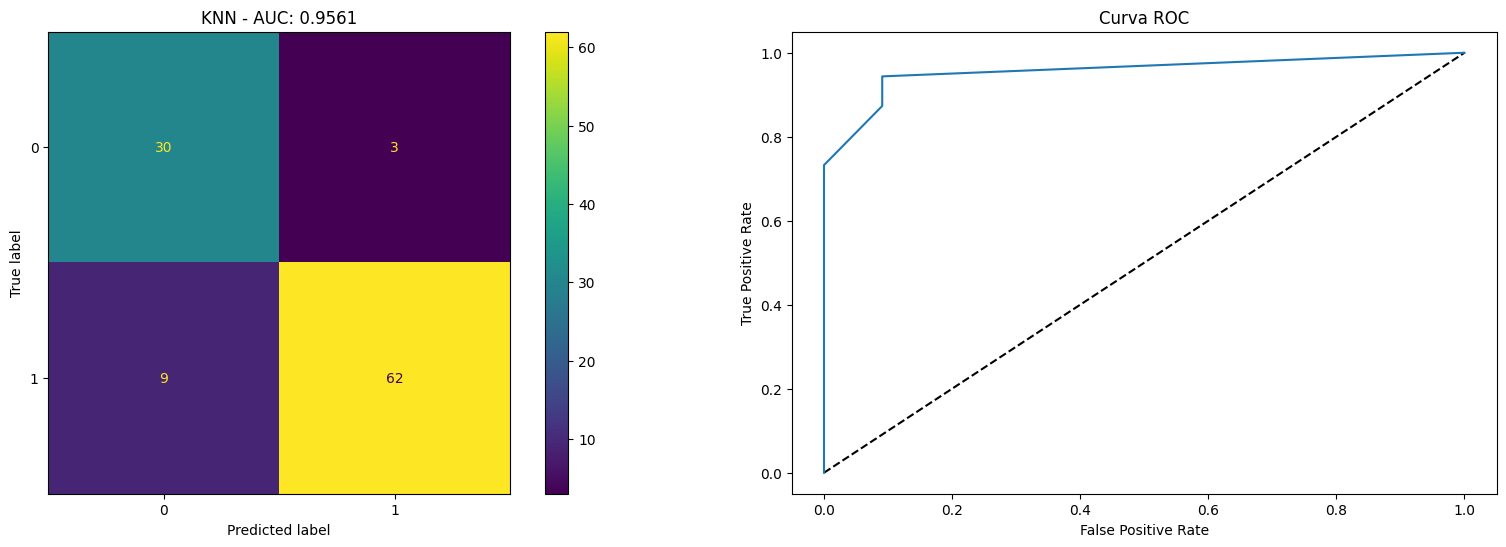

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        33
           1       0.95      0.87      0.91        71

    accuracy                           0.88       104
   macro avg       0.86      0.89      0.87       104
weighted avg       0.90      0.88      0.89       104

--------------------------------------------------



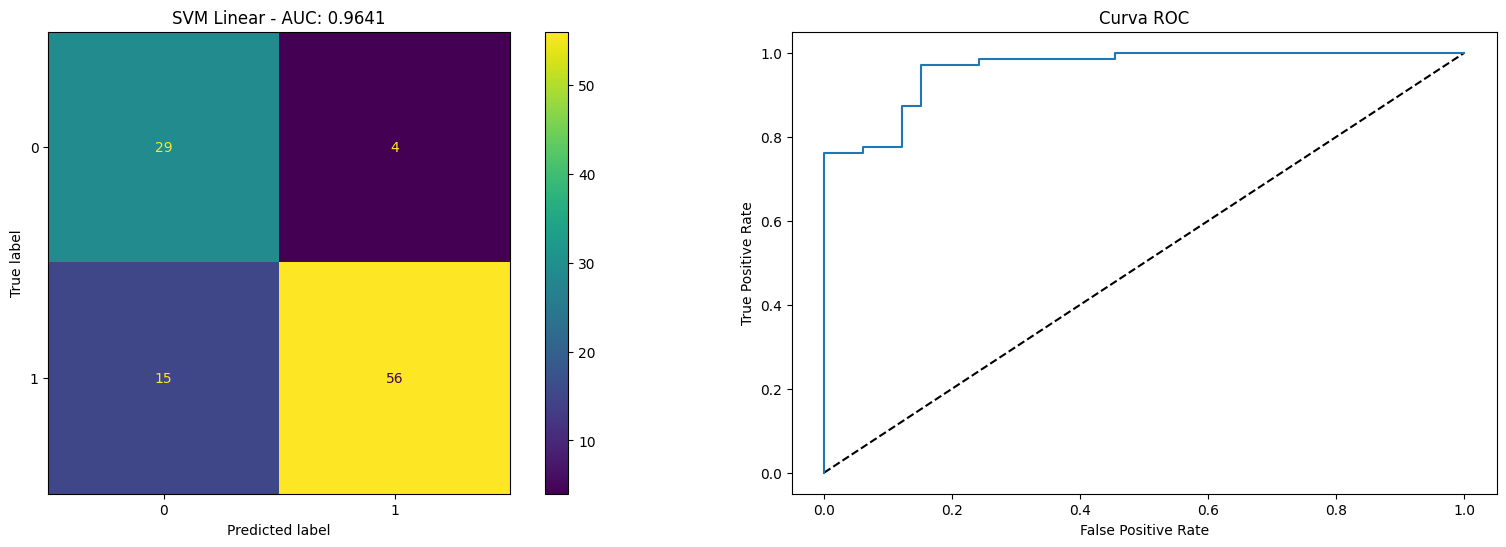

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        33
           1       0.93      0.79      0.85        71

    accuracy                           0.82       104
   macro avg       0.80      0.83      0.80       104
weighted avg       0.85      0.82      0.82       104

--------------------------------------------------



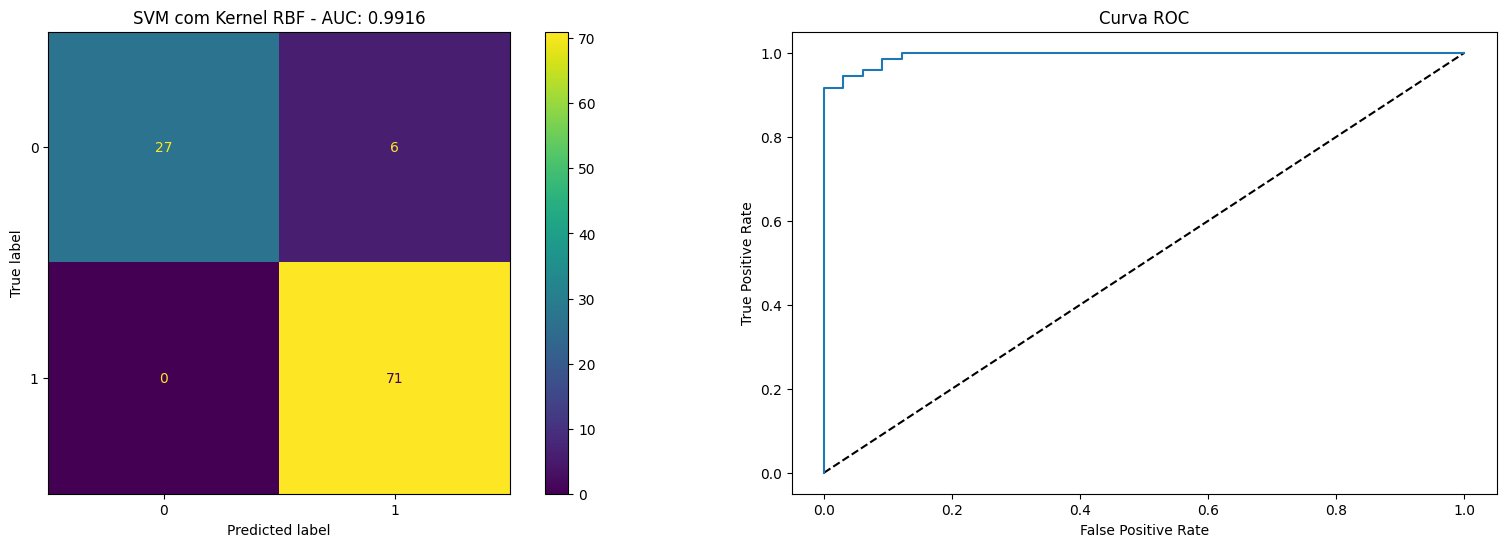

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.92      1.00      0.96        71

    accuracy                           0.94       104
   macro avg       0.96      0.91      0.93       104
weighted avg       0.95      0.94      0.94       104

--------------------------------------------------



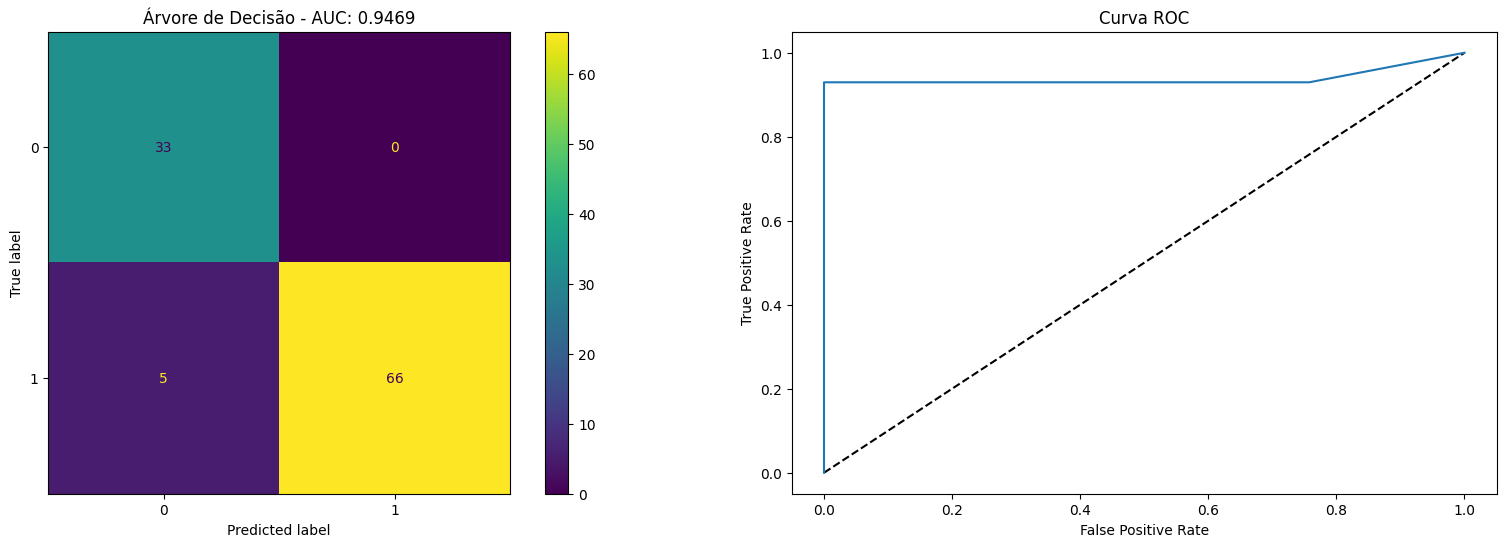

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

--------------------------------------------------



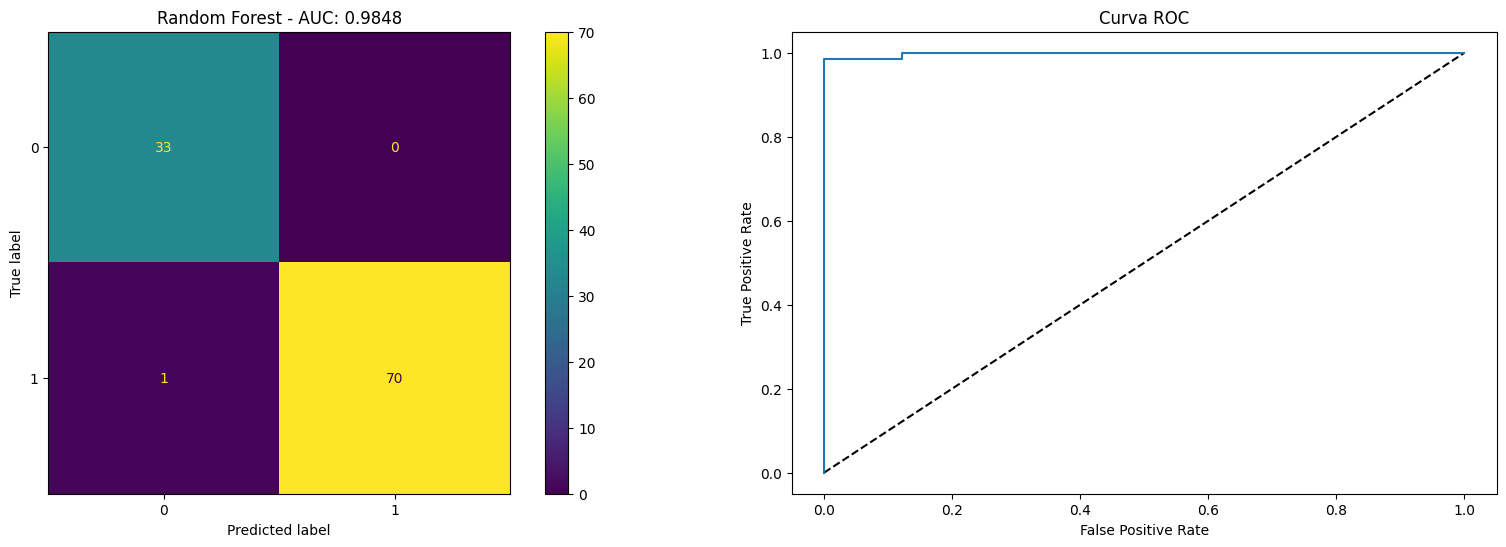

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

--------------------------------------------------



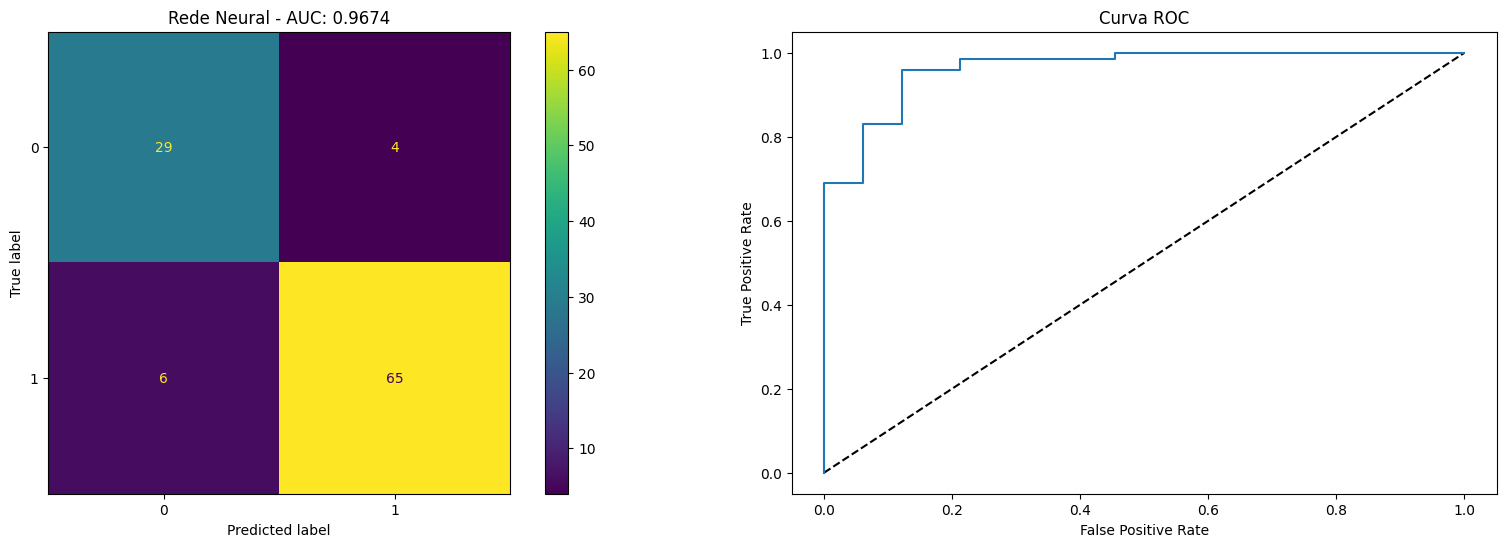

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.94      0.92      0.93        71

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.91      0.90      0.90       104

--------------------------------------------------



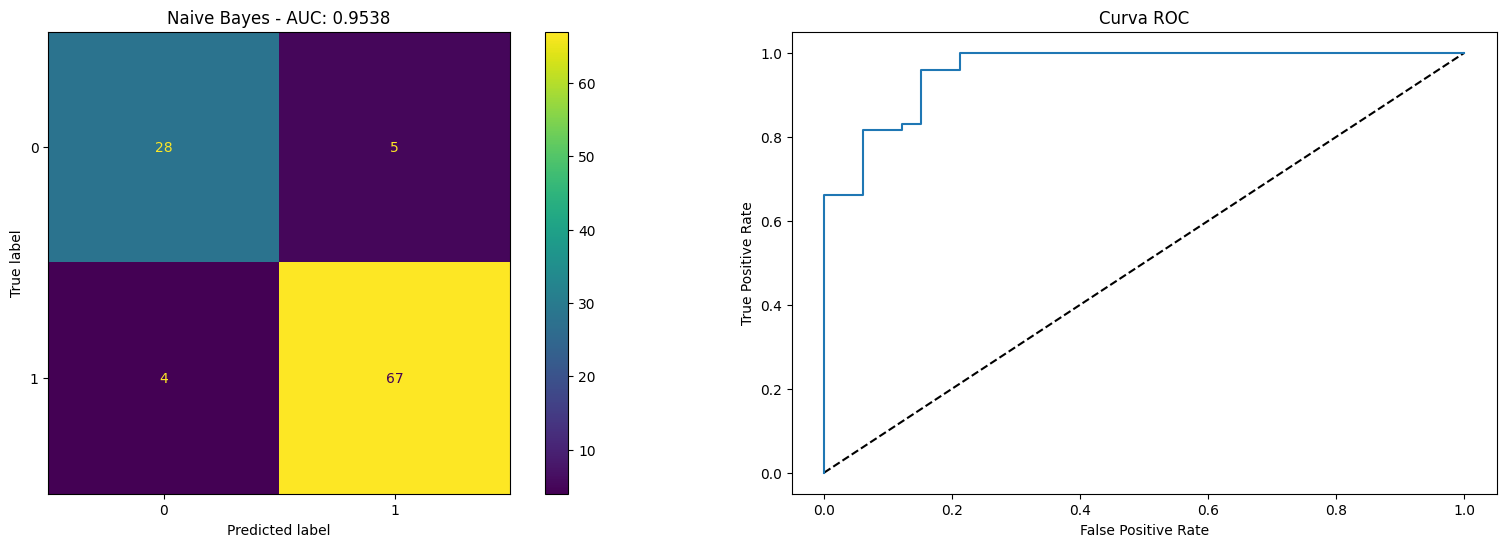

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104

--------------------------------------------------



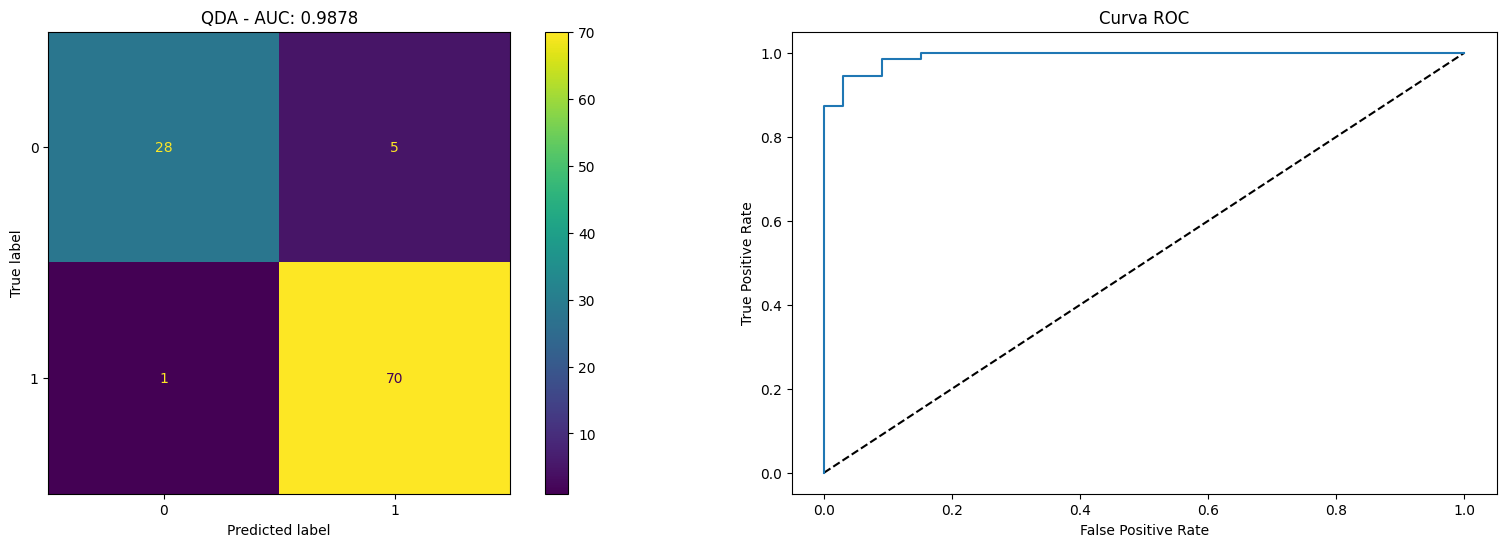

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.93      0.99      0.96        71

    accuracy                           0.94       104
   macro avg       0.95      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104

--------------------------------------------------



In [43]:
# Treinamento e avaliação dos modelos
for name, clf in clfs.items():
    clf.fit(X_train, y_train) # Treina o modelo
    cv_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc') # Calcula a métrica AUC com validação cruzada
    auc = np.mean(cv_auc).round(4)
    
    y_pred = clf.predict(X_test) # Predição
    
    # Plota a matriz de confusão
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax1)
    ax1.set_title(f'{name} - AUC: {auc}')
    
    # Plota a curva ROC quando o algoritmo calcula as probabilidades
    if hasattr(clf, 'predict_proba'):
        y_pred_prob = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        ax2.plot([0, 1], [0, 1], 'k--')
        ax2.plot(fpr, tpr)
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('Curva ROC')
    
    plt.show()
    
    # Imprime o relatório detalhado com todas as métricas do modelo
    print(classification_report(y_test, y_pred))
    print('-' * 50, end='\n\n')

In [44]:
# Divisão dos dados para treinamento final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Modelos selecionados para aprofundar análise
rf = RandomForestClassifier( max_depth=5, n_estimators=10, max_features=10, random_state=42)
dt = DecisionTreeClassifier( max_depth=5, random_state=42)

In [46]:
# Treinamento dos modelos finais
modelo_rf = rf.fit(X_train, y_train)
modelo_dt = dt.fit(X_train, y_train)

In [47]:
# Função para plotar a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_title(title)
    ax.set_xlabel("Nº de registros")
    ax.set_ylabel("Acurácia")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, return_times=True)

    ax.grid()

    ax.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                    np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1, color="r")
    ax.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                    np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1, color="g")

    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Treino")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Validação cruzada")
    ax.legend(loc="best")
    plt.show()

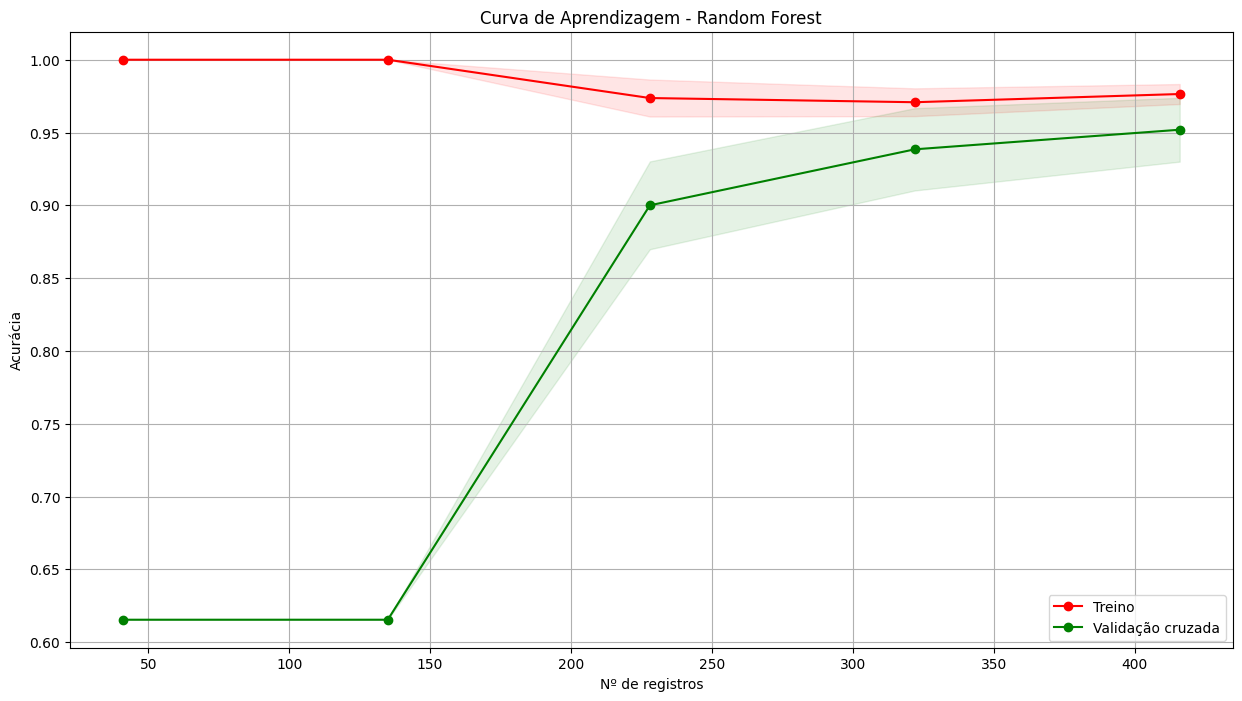

In [48]:
# Plota a curva de aprendizado para Random Forest
plot_learning_curve(modelo_rf, title="Curva de Aprendizagem - Random Forest", X=X, y=y, cv=5)

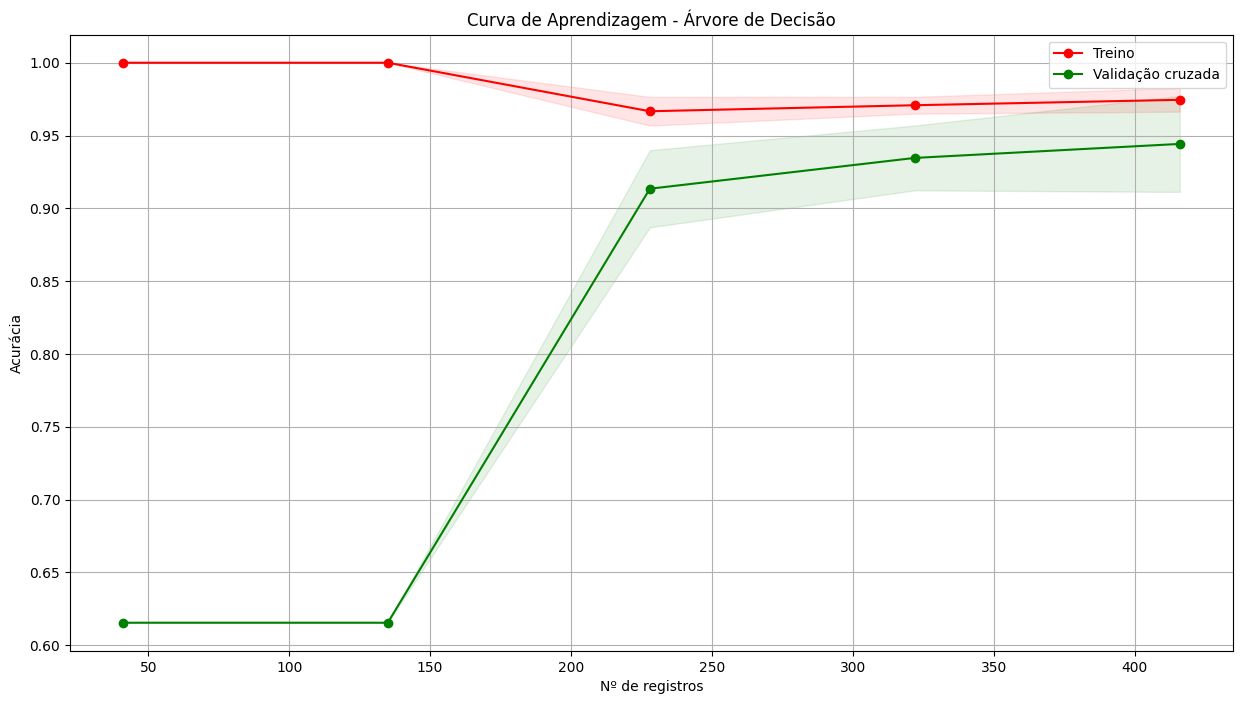

In [49]:
# Plota a curva de aprendizado para Árvore de Decisão
plot_learning_curve(dt, title="Curva de Aprendizagem - Árvore de Decisão", X=X, y=y, cv=5)

In [50]:
# Criar nova pessoa
nova_pessoa = pd.DataFrame({
    'Idade': [50],
    'Sexo': [1],  # 1 = Masculino, 0 = Feminino
    'Poliúria': [1],
    'Polidipsia': [1],
    'Perda de Peso Súbita': [1],
    'Fraqueza': [1],
    'Polifagia': [0],
    'Candidíase Genital': [0],
    'Visão Embaçada': [1],
    'Coceira': [0],
    'Irritabilidade': [0],
    'Cicatrização Demorada': [1],
    'Paresia Parcial': [0],
    'Rigidez Muscular': [0],
    'Alopecia': [0],
    'Obesidade': [1]
})[X.columns]  # Garante a mesma ordem das colunas do modelo

In [51]:
# Previsões
pred_rf = modelo_rf.predict(nova_pessoa)
prob_rf = modelo_rf.predict_proba(nova_pessoa)[0][1]

pred_dt = modelo_dt.predict(nova_pessoa)
prob_dt = modelo_dt.predict_proba(nova_pessoa)[0][1]

In [52]:
# Exibir resultados
print(f"Random Forest → Previsão: {pred_rf[0]} - {'Diabético' if pred_rf[0]==1 else 'Não Diabético'} | Probabilidade: {round(prob_rf*100, 2)}%")
print(f"Árvore de Decisão → Previsão: {pred_dt[0]} - {'Diabético' if pred_dt[0]==1 else 'Não Diabético'} | Probabilidade: {round(prob_dt*100, 2)}%")

Random Forest → Previsão: 1 - Diabético | Probabilidade: 100.0%
Árvore de Decisão → Previsão: 1 - Diabético | Probabilidade: 100.0%


In [53]:
# AUC com validação cruzada
cv_rf = cross_val_score(modelo_rf, X, y, cv=5, scoring='roc_auc')
cv_dt = cross_val_score(modelo_dt, X, y, cv=5, scoring='roc_auc')

In [54]:
print(f"\n📈 AUC Média - Random Forest: {np.mean(cv_rf).round(4) * 100}%")
print(f"📈 AUC Média - Árvore de Decisão: {np.mean(cv_dt).round(4) * 100}%")


📈 AUC Média - Random Forest: 98.09%
📈 AUC Média - Árvore de Decisão: 94.73%


In [56]:
# Salva os modelos treinados para uso posterior no app
joblib.dump(modelo_rf, "modelo_rf.joblib")
joblib.dump(modelo_dt, "modelo_dt.joblib")

# Calcula e salva as métricas principais para uso no app
metricas_modelos = []

for nome, modelo in [("Random Forest", modelo_rf), ("Árvore de Decisão", modelo_dt)]:
    y_pred = modelo.predict(X_test)
    metricas_modelos.append({
        "modelo": nome,
        "acuracia": accuracy_score(y_test, y_pred),
        "precisao": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "matriz_confusao": confusion_matrix(y_test, y_pred)
    })

joblib.dump(metricas_modelos, "metricas_modelos.joblib")

['metricas_modelos.joblib']